# LAB 1 - APP

Q1: Demonstrate Plots with Maps

Q2: Apply 3D visualization concepts

 necessary libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd 
import matplotlib.colors as colors

Taking Uttar Pradesh as a State 
using GPD to read our File 


In [ ]:

gdf_districts = gpd.read_file('C:/Users/91639/Desktop/CHRIST UNIVERSITY MCA/PYYHON TRI-1/UttarPradesh.geojson') 
print(gdf_districts.head())

               id  d_id_11 Country            Name        Admin  \
0            Agra      493   INDIA            Agra  Gaurav Sahu   
1         Aligarh      494   INDIA         Aligarh  Gaurav Sahu   
2       Allahabad      495   INDIA       Allahabad  Gaurav Sahu   
3  Ambedkar Nagar      496   INDIA  Ambedkar Nagar  Gaurav Sahu   
4         Auraiya      497   INDIA         Auraiya  Gaurav Sahu   

           State                                           geometry  
0  Uttar Pradesh  POLYGON ((77.9004 27.26083, 77.93092 27.24294,...  
1  Uttar Pradesh  POLYGON ((77.83832 28.14633, 77.92947 28.08253...  
2  Uttar Pradesh  POLYGON ((81.9371 25.74369, 82.01396 25.74557,...  
3  Uttar Pradesh  POLYGON ((82.57671 26.60777, 82.65536 26.60844...  
4  Uttar Pradesh  POLYGON ((79.38261 26.93586, 79.42937 26.94678...  


Now importing the CSV file of Covid data

In [ ]:

df = pd.read_csv('UP_Covid_Data.csv')
print(df.head(5))

         District  Deaths
0            Agra     488
1         Aligarh     131
2       Allahabad    1218
3  Ambedkar Nagar     192
4          Amethi     106


Now Merging both the files by left join using merge 

In [ ]:

gdf_merged = gdf_districts.merge(df, left_on='Name', right_on='District', how='left')
print(gdf_merged.head(5))

NameError: name 'gdf_districts' is not defined

Plot the district-wise COVID death details in a state map with proper formatting
using GeoPandas.

Now plotting it

/var/folders/0z/v3sdyt153lq3dbr23_yy2pxc0000gn/T/ipykernel_17230/2956282451.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('OrRd')


NameError: name 'gdf_merged' is not defined

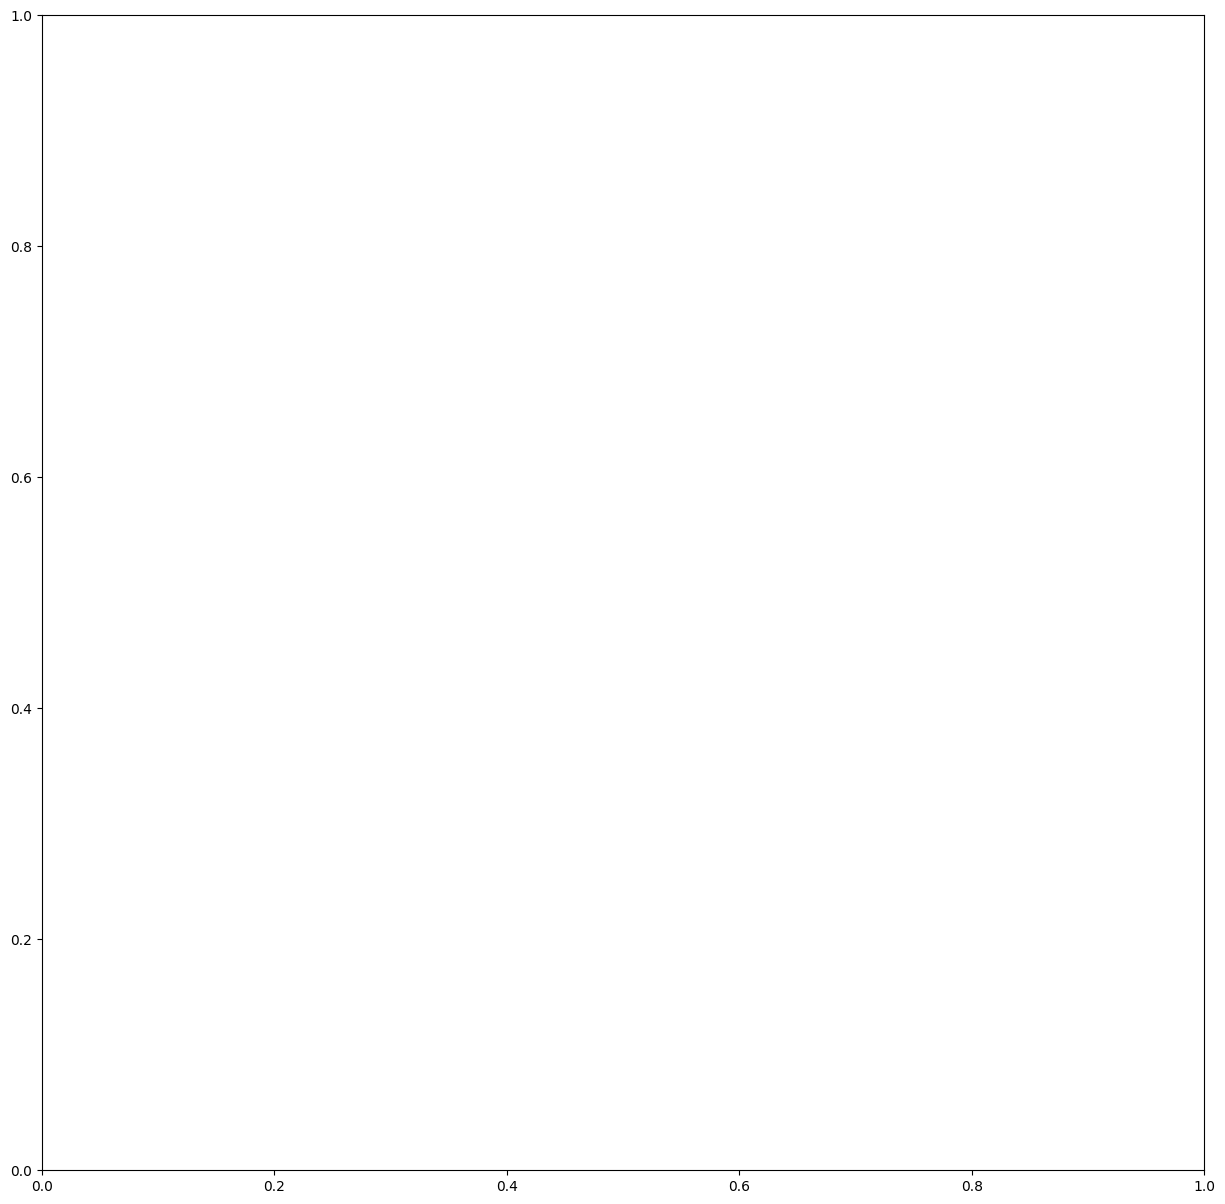

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# Create figure
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

# Color map
cmap = plt.cm.get_cmap('OrRd')
cmap.set_bad(color='lightgrey')

# Normalize deaths
normalize = colors.Normalize(
    vmin=gdf_merged['Deceased'].min(),
    vmax=gdf_merged['Deceased'].max()
)

# Plot district-wise COVID deaths
gdf_merged.plot(
    column='Deceased',
    cmap=cmap,
    norm=normalize,
    ax=ax,
    legend=True,
    edgecolor='black',
    linewidth=0.5
)

# Add district labels (use DISTRICT column)
for x, y, label in zip(
    gdf_merged.geometry.centroid.x,
    gdf_merged.geometry.centroid.y,
    gdf_merged['DISTRICT']
):
    ax.text(x, y, label, fontsize=8, ha='center', va='center')

# Titles and labels
ax.set_title(
    'Maharashtra District-wise COVID Death Details',
    fontdict={'fontsize': 15, 'fontweight': 'bold'}
)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()


1. Import the “mortality” dataset.

2. Generate an image of four scatter plots(2D plot for alive, 2D plot for notalive, 3D plot
for alive, 3D plot for notalive)

Demonstrate Plots with Maps

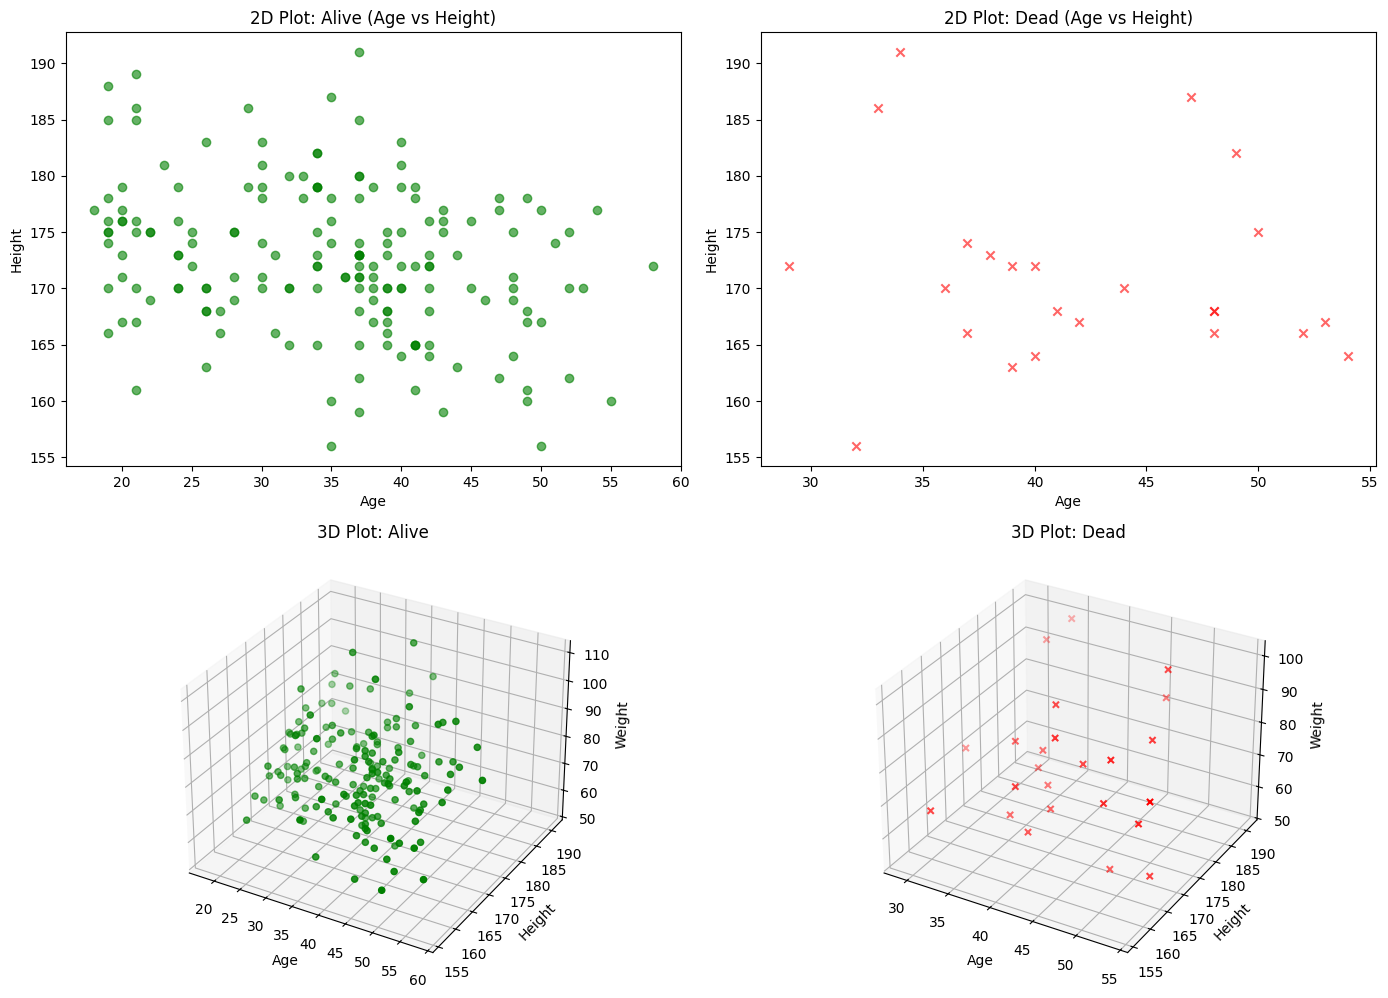

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

df = pd.read_csv('MortalityDataset.csv')

alive_data = df[df['MORT'] == 'alive']
dead_data = df[df['MORT'] == 'dead']

fig = plt.figure(figsize=(14, 10))

ax1 = fig.add_subplot(2, 2, 1)
ax1.scatter(alive_data['AGE'], alive_data['HEIGHT'], c='green', marker='o', alpha=0.6)
ax1.set_title('2D Plot: Alive (Age vs Height)')
ax1.set_xlabel('Age')
ax1.set_ylabel('Height')

ax2 = fig.add_subplot(2, 2, 2)
ax2.scatter(dead_data['AGE'], dead_data['HEIGHT'], c='red', marker='x', alpha=0.6)
ax2.set_title('2D Plot: Dead (Age vs Height)')
ax2.set_xlabel('Age')
ax2.set_ylabel('Height')

ax3 = fig.add_subplot(2, 2, 3, projection='3d')
ax3.scatter(alive_data['AGE'], alive_data['HEIGHT'], alive_data['WEIGHT'], c='green', marker='o')
ax3.set_title('3D Plot: Alive')
ax3.set_xlabel('Age')
ax3.set_ylabel('Height')
ax3.set_zlabel('Weight')

ax4 = fig.add_subplot(2, 2, 4, projection='3d')
ax4.scatter(dead_data['AGE'], dead_data['HEIGHT'], dead_data['WEIGHT'], c='red', marker='x')
ax4.set_title('3D Plot: Dead')
ax4.set_xlabel('Age')
ax4.set_ylabel('Height')
ax4.set_zlabel('Weight')

plt.tight_layout()
plt.show()

3. Generate an image of four bar plots(3D plot for BLOOD-A , 3D plot for BLOOD-B, 3D
plot for BLOOD-AB, 3D plot for BLOOD-O)

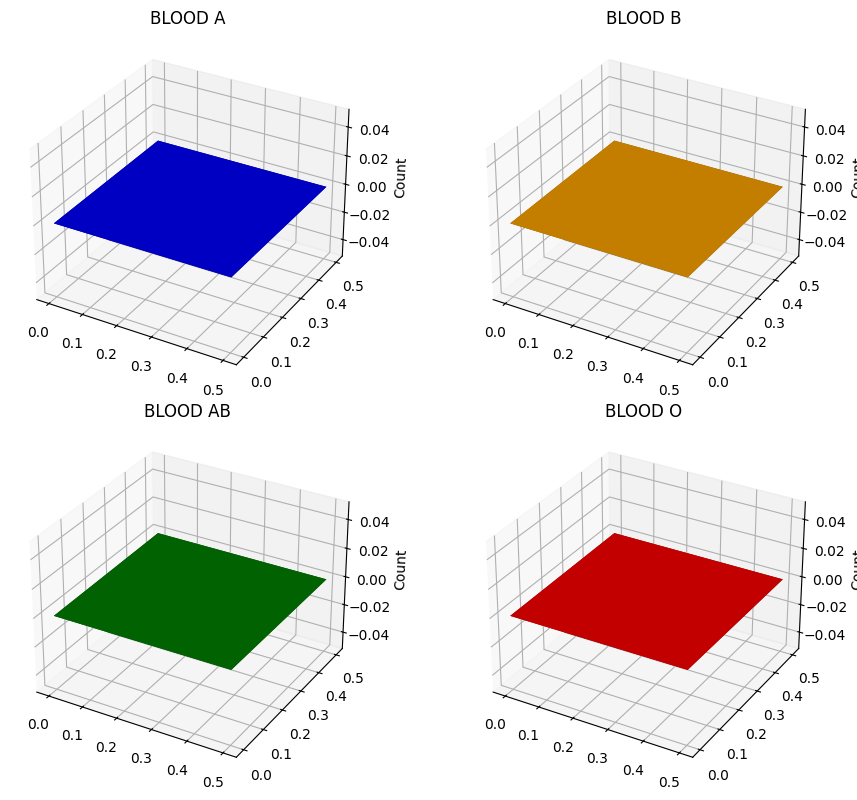

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

count_A  = len(df[df['BLOOD'] == 'A'])
count_B  = len(df[df['BLOOD'] == 'B'])
count_AB = len(df[df['BLOOD'] == 'AB'])
count_O  = len(df[df['BLOOD'] == 'O'])

fig = plt.figure(figsize=(10,8))

ax1 = fig.add_subplot(2,2,1, projection='3d')
ax1.bar3d(0, 0, 0, 0.5, 0.5, count_A, color='blue') 
ax1.set_title("BLOOD A")
ax1.set_zlabel("Count")

ax2 = fig.add_subplot(2,2,2, projection='3d')
ax2.bar3d(0, 0, 0, 0.5, 0.5, count_B, color='orange')
ax2.set_title("BLOOD B")
ax2.set_zlabel("Count")

ax3 = fig.add_subplot(2,2,3, projection='3d')
ax3.bar3d(0, 0, 0, 0.5, 0.5, count_AB, color='green')
ax3.set_title("BLOOD AB")
ax3.set_zlabel("Count")

ax4 = fig.add_subplot(2,2,4, projection='3d')
ax4.bar3d(0, 0, 0, 0.5, 0.5, count_O, color='red')
ax4.set_title("BLOOD O")
ax4.set_zlabel("Count")

plt.tight_layout()
plt.show()

4. Explore the Basemap library documentation. Draw any 10 types of plot using
various functions. Make sure each graph is drawn using a unique function.

USING ORTHOGRAPHIC PROJECTION

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0000000000000002].
C:\Users\91639\AppData\Local\Temp\ipykernel_26292\22645328.py:50: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  m.plot(x, y, 'ro', markersize=6, color='red')


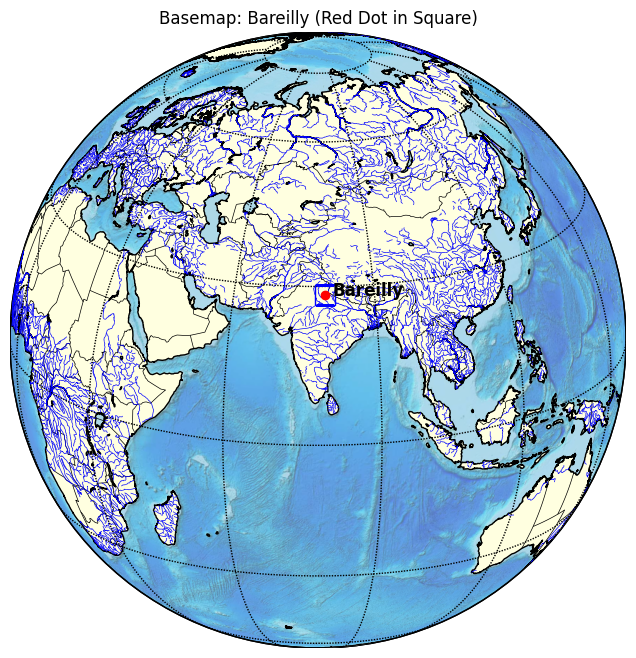

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np

plt.figure(figsize=(10, 8))

# (Orthographic projection)
m = Basemap(projection='ortho', lat_0=20, lon_0=78, resolution='l')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='lightyellow', lake_color='lightblue')
m.drawmapboundary(fill_color='lightblue')
m.drawrivers(color='blue')
m.drawstates()
m.drawparallels(np.arange(-90, 90, 30))
m.drawmeridians(np.arange(0, 360, 30))
m.etopo(scale=0.5, alpha=0.5)
lat, lon = 28.36, 79.43
x, y = m(lon, lat)
m.plot(x, y, 's', markersize=15, markeredgecolor='blue', markerfacecolor='none')
m.plot(x, y, 'ro', markersize=6, color='red') 

plt.text(x + 150000, y, 'Bareilly', fontsize=12, fontweight='bold', color='black')

plt.title("Basemap: Bareilly (Red Dot in Square)")
plt.show()

USING MERC PROJECTION

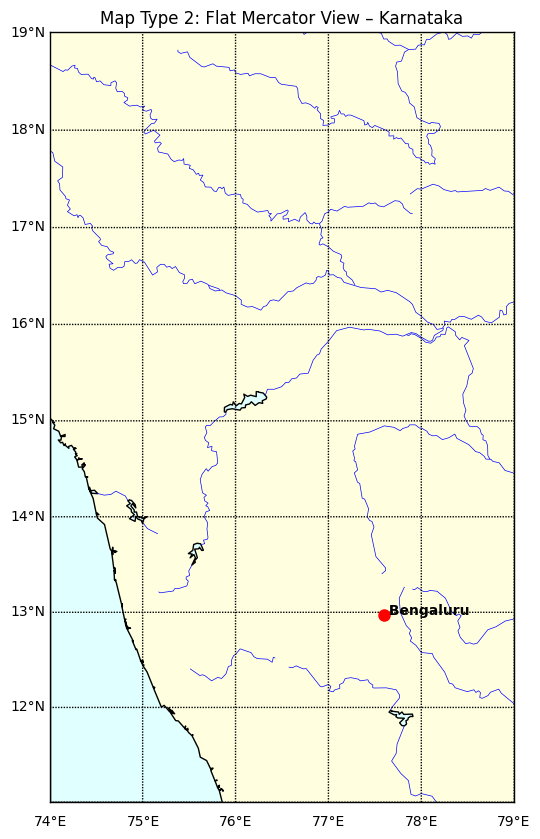

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np

plt.figure(figsize=(12, 10))

# Karnataka region bounds
m = Basemap(projection='merc',
            llcrnrlat=11, urcrnrlat=19,    # Karnataka latitude range
            llcrnrlon=74, urcrnrlon=79,    # Karnataka longitude range
            resolution='i')

m.drawcoastlines()
m.drawcountries(linewidth=2)
m.drawstates(color='blue', linewidth=1)
m.drawrivers(color='blue', linewidth=0.5)
m.drawmapboundary(fill_color='lightcyan')
m.fillcontinents(color='lightyellow', lake_color='lightcyan')

m.drawparallels(np.arange(10, 20, 1), labels=[1,0,0,0])
m.drawmeridians(np.arange(73, 80, 1), labels=[0,0,0,1])

m.shadedrelief()

# Mark Bengaluru
x, y = m(77.5946, 12.9716)   # Longitude, Latitude of Bengaluru
m.plot(x, y, 'ro', markersize=8)
plt.text(x, y, ' Bengaluru', fontweight='bold')

plt.title("Map Type 2: Flat Mercator View – Karnataka")
plt.show()


USING LCC PROJECTION

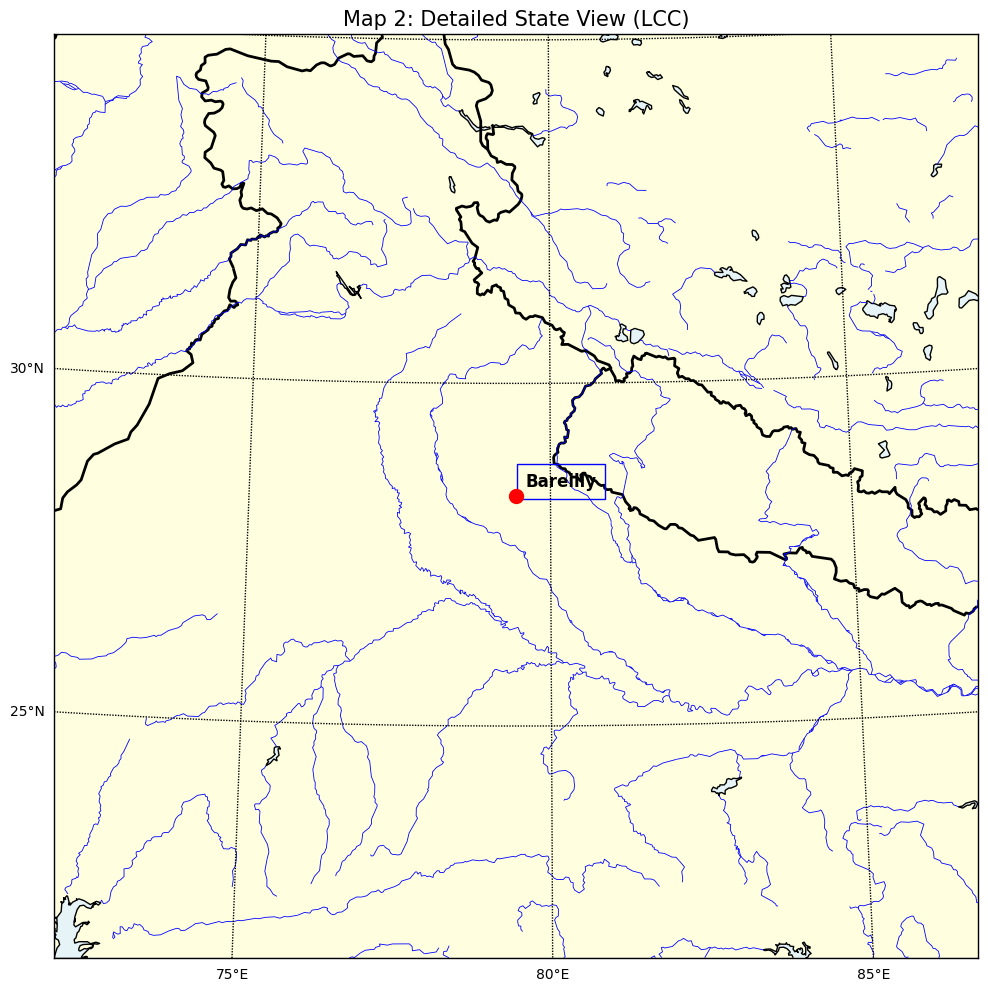

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np

plt.figure(figsize=(12, 12))

m = Basemap(
    projection='lcc',
    resolution='i',     
    width=1.5E6,         
    height=1.5E6,        
    lat_0=28.36,          
    lon_0=79.43           
)
m.drawcoastlines()
m.drawcountries(linewidth=2)
m.drawstates(color='black', linewidth=1)
m.fillcontinents(color='#FFFFE0', lake_color='#E6F3F7')
m.drawmapboundary(fill_color='#E6F3F7')
m.drawrivers(color='blue', linewidth=0.6)
m.drawparallels(np.arange(0., 50., 5.), labels=[1,0,0,0])
m.drawmeridians(np.arange(60., 100., 5.), labels=[0,0,0,1])
lat, lon = 28.36, 79.43
x, y = m(lon, lat)

m.plot(x, y, 'ro', markersize=10, zorder=5)
plt.text(
    x + 15000, y + 15000, 
    'Bareilly', 
    fontsize=12, 
    fontweight='bold',
    bbox=dict(facecolor='none', edgecolor='blue', boxstyle='square,pad=0.5')
)

plt.title("Map 2: Detailed State View (LCC)", fontsize=15)
plt.show()